In [1]:
## Problem Statement
#1. What changes company should bring to reduce the number of absenteeism?
#2. How much losses every month can we project in 2011 if same trend of
#absenteeism continues?

In [2]:
## Set Working Directory
import os
os.getcwd()
# os.chdir('Desktop/Project_2_Employee Absenteeism')

'/Users/abhishek/Desktop/Submitted_Files'

In [3]:
# set path for python as need basis
#import sys
#sys.path.insert(0, '/local/python/lib/python2.7/site-packages/')

In [4]:
##Import Libararies
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
##Import Data
data = pd.read_excel('Absenteeism_at_work_Project.xls')
data_org = data.copy()
col = data.columns
# Numerical and Categorical Variables
n_col = ['Transportation expense', 'Distance from Residence to Work','Service time', 
         'Age', 'Work load Average/day ', 'Hit target','Son','Pet', 'Weight', 'Height', 
         'Body mass index','Absenteeism time in hours']
c_col = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week','Seasons', 'Disciplinary failure', 
         'Education','Social drinker','Social smoker',]

In [6]:
##Explanatory Data Analysis
# Data Summary
data.shape
data[n_col].describe()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,733.000000,737.000000,737.000000,737.000000,730.000000,734.000000,734.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,1.017711,0.746612,79.063599,172.152893,26.684062,6.977716
std,66.954179,14.848124,4.389813,6.480148,38981.880873,3.792705,1.094928,1.319726,12.868630,6.081065,4.292819,13.476962
min,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,1.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


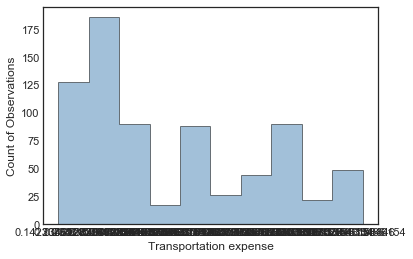

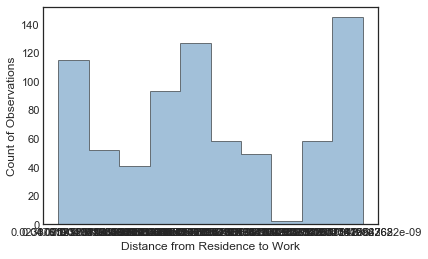

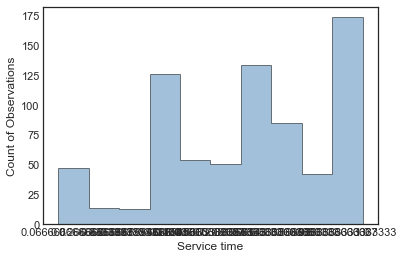

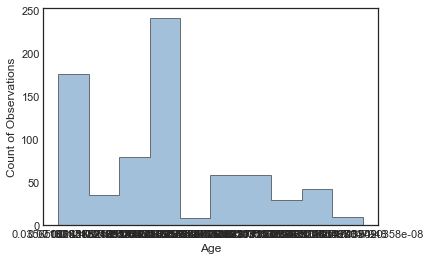

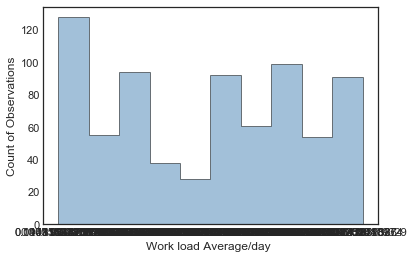

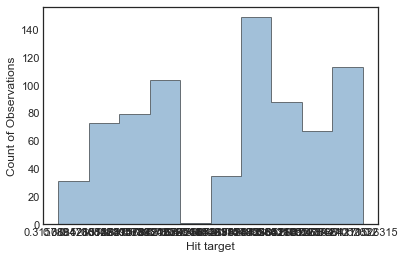

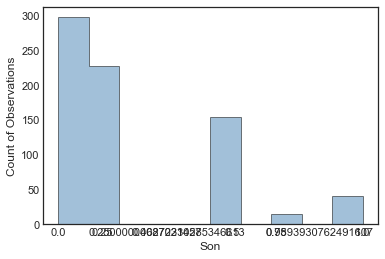

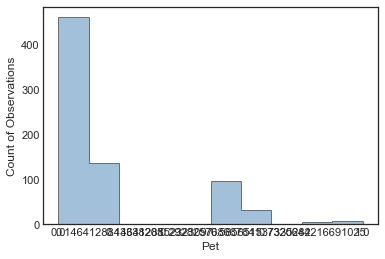

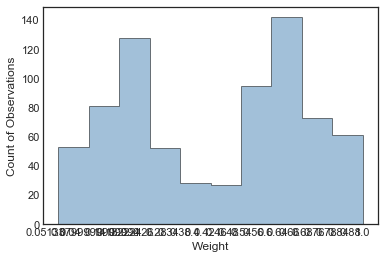

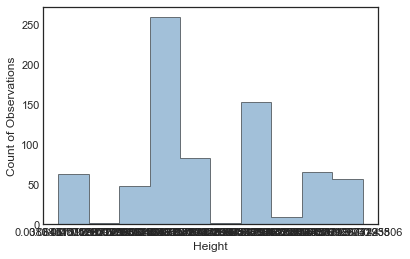

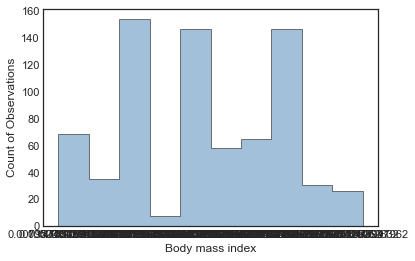

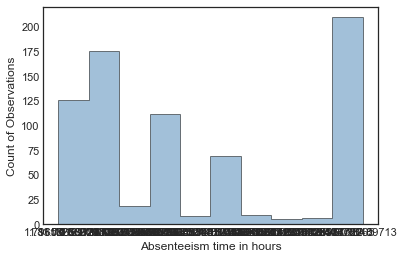

In [41]:
#Histogram - Numerical Variables
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
count = 1
for i in n_col:
    plt.figure()
    plt.hist(data[[i]],alpha = 0.5,histtype='stepfilled',color = 'steelblue',edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Count of Observations')

Text(0,0.5,'Count of Observations')

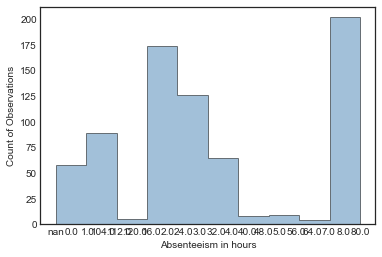

In [8]:
plt.figure()
plt.hist(data[['Absenteeism time in hours']],alpha = 0.5,histtype='stepfilled',color = 'steelblue',edgecolor='black')
plt.xlabel('Absenteeism in hours')
plt.ylabel('Count of Observations')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Text(0,0.5,'Count of Observations')

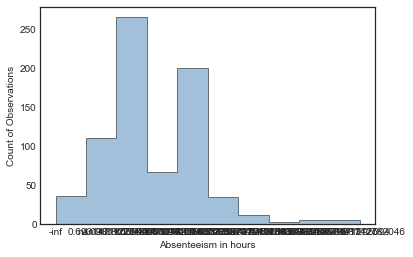

In [9]:
plt.figure()
plt.hist(np.log(data[['Absenteeism time in hours']]),alpha = 0.5,histtype='stepfilled',color = 'steelblue',edgecolor='black')
plt.xlabel('Absenteeism in hours')
plt.ylabel('Count of Observations')


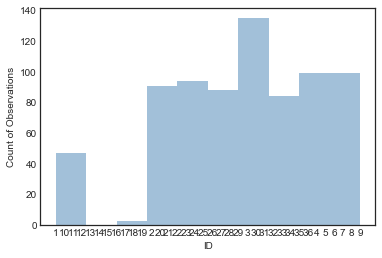

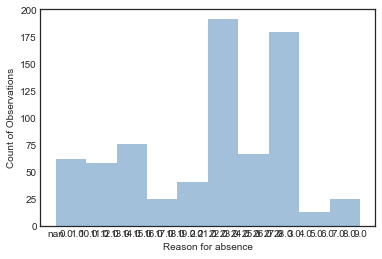

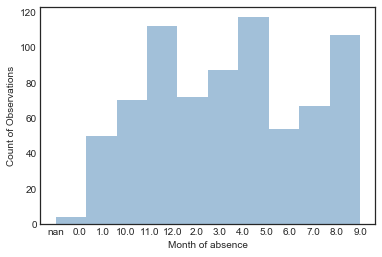

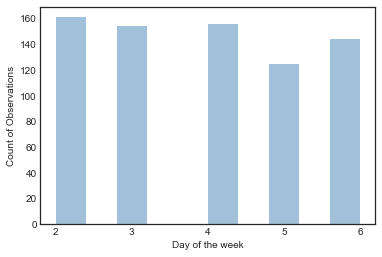

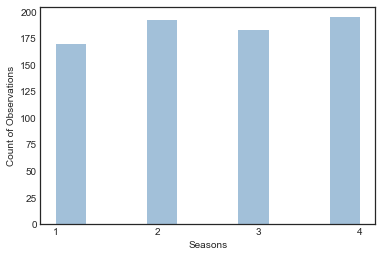

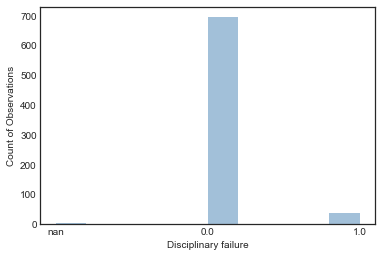

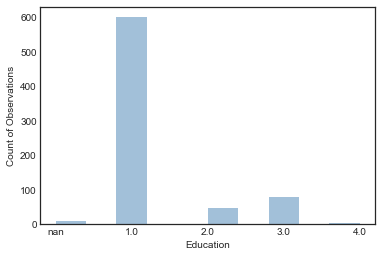

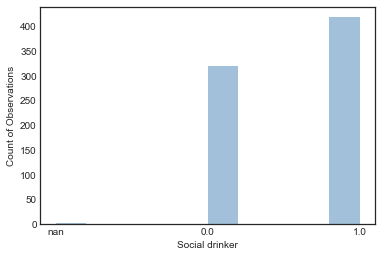

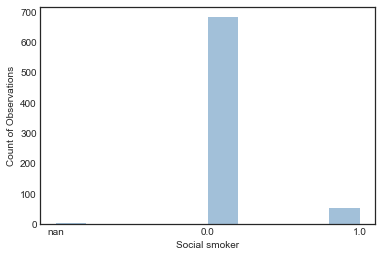

In [10]:
#Histogram - Categorical Variables
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
count = 1
for i in c_col:
    plt.figure()
    plt.hist(data[[i]],alpha = 0.5,histtype='stepfilled',color = 'steelblue',edgecolor='none')
    plt.xlabel(i)
    plt.ylabel('Count of Observations')

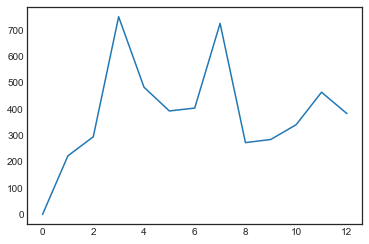

In [11]:
d = data.pivot_table(index='Month of absence',aggfunc={'Absenteeism time in hours':sum})
#data.groupby(['Month of absence', 'Day of the week'])['Absenteeism time in hours'].aggregate('sum').unstack()
d = d.reset_index()
plt.plot(d['Month of absence'],d['Absenteeism time in hours'])

In [12]:
#Freq distribution for category Variable
import pandas as pd
for i in c_col:
    df1 = pd.Series(data[i]).value_counts().reset_index().sort_values('index').reset_index(drop=True)
    df1.columns = ['Values', 'Frequency']
    print(i)
    print(df1)

ID
    Values  Frequency
0        1         23
1        2          6
2        3        113
3        4          1
4        5         19
5        6          8
6        7          6
7        8          2
8        9          8
9       10         24
10      11         40
11      12          7
12      13         15
13      14         29
14      15         37
15      16          2
16      17         20
17      18         16
18      19          3
19      20         42
20      21          3
21      22         46
22      23          8
23      24         30
24      25         10
25      26          5
26      27          7
27      28         76
28      29          5
29      30          7
30      31          3
31      32          5
32      33         24
33      34         55
34      35          1
35      36         34
Reason for absence
    Values  Frequency
0      0.0         43
1      1.0         16
2      2.0          1
3      3.0          1
4      4.0          2
5      5.0          3
6      6.0

In [13]:
data.pivot_table(index='Month of absence', columns = 'Day of the week', aggfunc={'Absenteeism time in hours':sum})

Absenteeism time in hours                           
Day of the week                          2      3      4     5      6
Month of absence                                                     
0.0                                    NaN    0.0    0.0   NaN    0.0
1.0                                   88.0   45.0   36.0  42.0   11.0
2.0                                   47.0   51.0   68.0  62.0   66.0
3.0                                  262.0  213.0  120.0  67.0   87.0
4.0                                   61.0   31.0  234.0  36.0  120.0
5.0                                  118.0   22.0  122.0  26.0  104.0
6.0                                  120.0   47.0  127.0  65.0   44.0
7.0                                  236.0  325.0   53.0  47.0   63.0
8.0                                   86.0   72.0   15.0  66.0   33.0
9.0                                  117.0   47.0   81.0   8.0   31.0
10.0                                  75.0   51.0  108.0  71.0   35.0
11.0                                 127.0  159.0   86.0  40.0   51.0
12.0                                  32.0  243.0   41.0  23.0   43.0

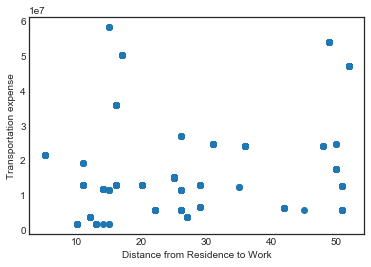

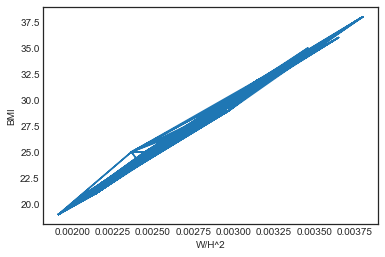

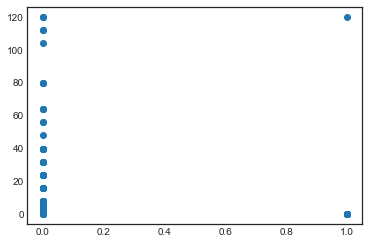

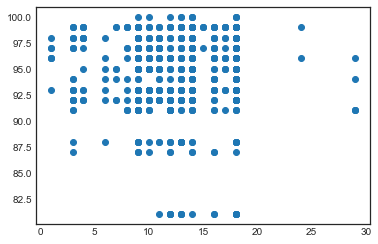

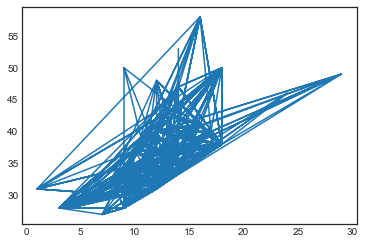

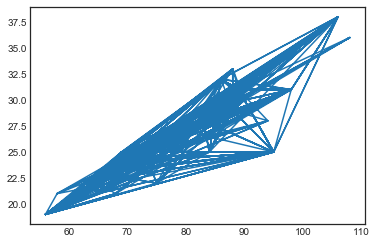

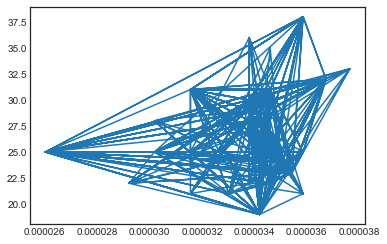

In [14]:
# Scatter Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.figure()
plt.plot(data['Distance from Residence to Work'],data['Transportation expense']**3,'o')
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Transportation expense')
plt.figure()
plt.plot(data['Weight']/data['Height']**2,data['Body mass index'])
plt.xlabel('W/H^2')
plt.ylabel('BMI')
plt.figure()
plt.plot(data['Disciplinary failure'],data['Absenteeism time in hours'],'o')
plt.figure()
plt.plot(data['Service time'],data['Hit target'],'o')
plt.figure()
plt.plot(data['Service time'],data['Age'])
plt.figure()
plt.plot(data['Weight'],data['Body mass index'])
plt.figure()
plt.plot(1/data['Height']**2,data['Body mass index'])

In [ ]:
data['season'].

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarnin

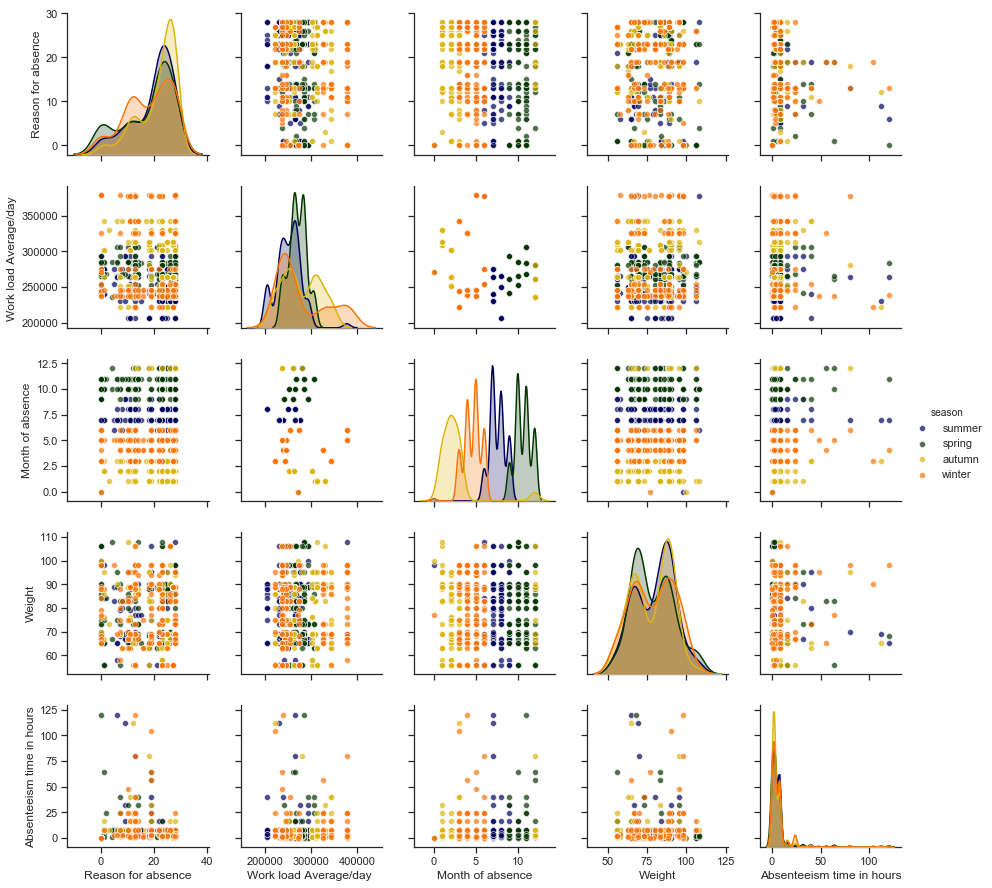

In [15]:
# Scatter Pair Plots
# Create columns of seasons for pair plotting colors
# Seasons (summer (1), autumn (2), winter (3), spring (4))
seasons = data['season']
for i in range(len(seasons)):
    if seasons[i] == 1:
        seasons[i] = 'summer'
    if seasons[i] == 2:
        seasons[i] = 'autumn'
    if seasons[i] == 3:
        seasons[i] = 'winter'
    if seasons[i] == 4:
        seasons[i] = 'spring'

# Will only use six variables for plotting pairs
reduced_features = data[['Reason for absence', 'Work load Average/day ', 'Month of absence', 
                         'Weight','Absenteeism time in hours']].copy()
reduced_features['season'] = seasons
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);
# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))


In [16]:
data = data_org
#data.head()

In [17]:
# Assigning Levels/Categories to Categorical Variables
#for i in c_col:
#    data[i] = pd.Categorical(data[i])
#    print(i)
#    data[i] = data[i].cat.codes
#data['Reason for absence'].unique()
# Above Code replaces 'nan' with '-1', replacing '-1' with 'nan' to impute
#for i in c_col:
#    data[i] = data[i].replace(-1,np.nan)
#print(sorted(data.Seasons.unique()), end = ' ')

In [18]:
# Identify Columnwise Missing Values 
missing_val = pd.DataFrame(data.isnull().sum())
missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index' : 'variables', 0:'miss_value'})
row,col = data.shape
missing_val['miss_percentage'] = round((missing_val['miss_value']/row)*100,2)
missing_val = missing_val.sort_values('miss_percentage',ascending=False)
# Select sample data and find best method to predict missing values
missing_val

,miss_value,miss_percentage
Body mass index,31,4.19
Absenteeism time in hours,22,2.97
Height,14,1.89
Work load Average/day,10,1.35
Education,10,1.35
Transportation expense,7,0.95
Son,6,0.81
Disciplinary failure,6,0.81
Hit target,6,0.81
Social smoker,4,0.54


In [19]:
# impute BMI, Weight,Height
temp = data[['Weight', 'Height', 'Body mass index']]
temp['pred_BMI'] = (data['Weight']/(data['Height']**2))*10000
temp['error_BMI'] = temp['Body mass index']-temp['pred_BMI']
print(temp['error_BMI'].dropna().mean())
data['Body mass index'].fillna((data['Weight']/(data['Height']**2))*10000,inplace = True)
# impute Height
temp['pred_Height'] = ((data['Weight']/data['Body mass index'])*10000)**0.5
temp['error_Height'] = temp['Height']-temp['pred_Height']
print(temp['error_Height'].dropna().mean())
data['Height'].fillna(((data['Weight']/data['Body mass index'])*10000)**0.5,inplace = True)
# impute Weight
temp['pred_Weight'] = ((data['Height']**2)*data['Body mass index'])/10000
temp['error_Weight'] = temp['Weight']-temp['pred_Weight']
print(temp['error_Weight'].dropna().mean())
data['Weight'].fillna(((data['Height']**2)*data['Body mass index'])/10000,inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


-0.0070799545935228145


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


-0.03872688175341695
0.014961058344639218


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [21]:
# Selecting best method to impute missing value
# Crete dummy missing value
temp_data = data
temp_data['Body mass index'].iloc[22] # 27.0
temp_data['Body mass index'].iloc[22] = np.NaN
#temp_data['Body mass index'].iloc[22]
temp_data['Body mass index'].mean() #26.68
temp_data['Body mass index'].iloc[22] = np.NaN
temp_data['Body mass index'].median() #25
temp_data['Body mass index'].iloc[22] = np.NaN
temp_data = pd.DataFrame(KNN(k=3).complete(temp_data),columns = temp_data.columns)
temp_data['Body mass index'].iloc[22] # 27
# Best match by KNN
data = temp_data
# Check any Columnwise Missing Values 
pd.DataFrame(data.isnull().sum())

Imputing row 1/740 with 0 missing, elapsed time: 0.126
Imputing row 101/740 with 0 missing, elapsed time: 0.128
Imputing row 201/740 with 0 missing, elapsed time: 0.129
Imputing row 301/740 with 0 missing, elapsed time: 0.130
Imputing row 401/740 with 0 missing, elapsed time: 0.131
Imputing row 501/740 with 0 missing, elapsed time: 0.132
Imputing row 601/740 with 0 missing, elapsed time: 0.132
Imputing row 701/740 with 0 missing, elapsed time: 0.133


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0


In [22]:
# Dropping the 22 missing 'Absenteeism time in hours' observations
#data = data.iloc[data['Absenteeism time in hours'].dropna().index,:]
#data.shape

In [23]:
#Remove Outliers using IQR
#for i in n_col:
#    q25,q75 = np.percentile(data[i],[25,75])
#   iqr = q75-q25
#   max = q75+1.5*iqr
#    min = q25-1.5*iqr
#    data = data.drop(data[data.loc[:,i]<min].index)
#    data = data.drop(data[data.loc[:,i]>max].index)
# data.shape (516,21)

In [24]:
# Impute outliers 
df = data
for col in n_col:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]
data = df
data.shape

(740, 21)

In [25]:
data_wo_scal = data 

In [26]:
# Impute Outliers
#data = temp_data
#for i in col_name:
#    q25,q75 = np.percentile(data[i],[25,75])
#    iqr = q75-q25
#    max = q75+1.5*iqr
#    min = q25-1.5*iqr
#    data[i][data[i]>max] = np.NaN
#    data[i][data[i]<min] = np.NaN

#data = pd.DataFrame(KNN(k=3).complete(data),columns = data.columns)
#data.shape

In [27]:
#Feature Scaling
for i in n_col[:11]:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())
data.shape, #data.head()

((740, 21),)

In [28]:
# Correlation Analysis
rho = data[n_col].corr()
rho

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
Transportation expense,1.000000,0.265880,-0.385070,-0.234324,-0.005541,-0.080839,0.383459,0.422077,-0.210529,-0.196214,-0.138252,0.050211
Distance from Residence to Work,0.265880,1.000000,0.128355,-0.144248,-0.076107,-0.014660,0.055238,0.203273,-0.055182,-0.357770,0.108486,-0.099710
Service time,-0.385070,0.128355,1.000000,0.674089,-0.002686,0.000013,-0.037123,-0.462882,0.442265,-0.053963,0.488172,0.014319
Age,-0.234324,-0.144248,0.674089,1.000000,-0.032103,-0.040589,0.053734,-0.241051,0.424381,-0.059511,0.478719,0.053474
Work load Average/day,-0.005541,-0.076107,-0.002686,-0.032103,1.000000,-0.085730,0.023862,-0.002416,-0.037284,0.104545,-0.089896,0.048467
Hit target,-0.080839,-0.014660,0.000013,-0.040589,-0.085730,1.000000,-0.013995,0.003800,-0.044495,0.093001,-0.085617,0.012239
Son,0.383459,0.055238,-0.037123,0.053734,0.023862,-0.013995,1.000000,0.114983,-0.139176,-0.016164,-0.145040,0.125136
Pet,0.422077,0.203273,-0.462882,-0.241051,-0.002416,0.003800,0.114983,1.000000,-0.104848,-0.107212,-0.070071,-0.037437
Weight,-0.210529,-0.055182,0.442265,0.424381,-0.037284,-0.044495,-0.139176,-0.104848,1.000000,0.310892,0.903468,0.000762
Height,-0.196214,-0.357770,-0.053963,-0.059511,0.104545,0.093001,-0.016164,-0.107212,0.310892,1.000000,-0.117363,0.123729


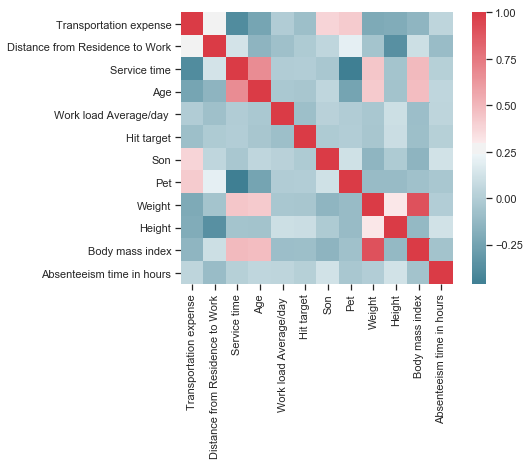

In [29]:
#Corelation Analysis
#Selecting Continuos Variable
data_corr = data.loc[:,n_col]
f,ax = plt.subplots(figsize = (7,5))
corr = data_corr.corr()

import seaborn as sns
sns.heatmap(corr,mask = np.zeros_like(corr, dtype = np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),
            square = True, ax =ax)

In [30]:
from scipy.stats import chi2_contingency
for i in c_col:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Absenteeism time in hours'],data[i]))
    print(p)

ID
2.3603259199891983e-08
Reason for absence
9.778247713398239e-51
Month of absence
0.002870640671945925
Day of the week
0.021920243503968814
Seasons
4.9960719958675816e-05
Disciplinary failure
7.161384404386607e-94
Education
1.0
Social drinker
5.3774159615384143e-08
Social smoker
0.0321527899076398


In [31]:
# Feature Importance Matrix Random Forest
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300).fit(data.iloc[:,0:20],data.iloc[:,20])
importances = list(rf_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(data.columns),
                                                                                      importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Reason for absence   Importance: 0.23
Variable: Work load Average/day  Importance: 0.13
Variable: Month of absence     Importance: 0.1
Variable: Day of the week      Importance: 0.09
Variable: Age                  Importance: 0.06
Variable: Hit target           Importance: 0.06
Variable: Height               Importance: 0.05
Variable: ID                   Importance: 0.04
Variable: Seasons              Importance: 0.04
Variable: Transportation expense Importance: 0.04
Variable: Distance from Residence to Work Importance: 0.04
Variable: Weight               Importance: 0.03
Variable: Son                  Importance: 0.02
Variable: Body mass index      Importance: 0.02
Variable: Service time         Importance: 0.01
Variable: Disciplinary failure Importance: 0.01
Variable: Social drinker       Importance: 0.01
Variable: Social smoker        Importance: 0.01
Variable: Pet                  Importance: 0.01
Variable: Education            Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

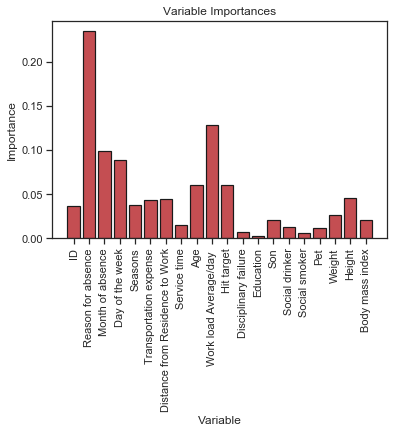

In [32]:
# lImportance plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, data.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Number of features for 95% importance: 14


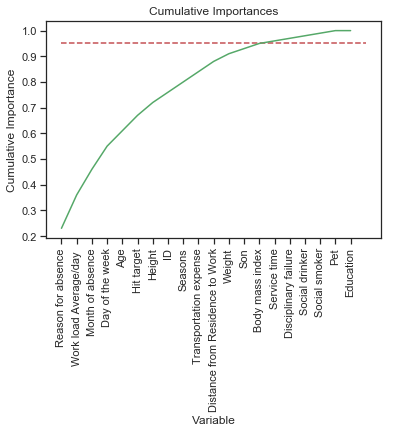

In [33]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

In [34]:
df1 = data.applymap(int)
for i in c_col:
    df1[i].astype('str')
temp = pd.DataFrame(df1['Absenteeism time in hours'])
temp = temp.join(data[n_col[0:-1]])
for i in c_col:
    d = pd.get_dummies(df1[i],prefix = i)
    temp = temp.join(d)
data_hotencod = temp
data_hotencod.shape

(740, 110)

In [35]:
data_wo_scal=data_wo_scal.applymap(int)
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,0.657692,0.619048,0.666667,0.178253,0.194471,...,0.0,1.0,0.50,1.0,0.0,0.146413,0.68,0.225806,0.578947,4.0
1,36.0,0.0,7.0,3.0,1.0,0.000000,0.071429,1.000000,0.784314,0.194471,...,1.0,1.0,0.25,1.0,0.0,0.000000,0.84,0.419355,0.631579,0.0
2,3.0,23.0,7.0,4.0,1.0,0.234615,0.976190,1.000000,0.356506,0.194471,...,0.0,1.0,0.00,1.0,0.0,0.000000,0.66,0.161290,0.631579,2.0
3,7.0,7.0,7.0,5.0,1.0,0.619231,0.000000,0.733333,0.392157,0.194471,...,0.0,1.0,0.50,1.0,1.0,0.000000,0.24,0.096774,0.263158,4.0
4,11.0,23.0,7.0,5.0,1.0,0.657692,0.619048,0.666667,0.178253,0.194471,...,0.0,1.0,0.50,1.0,0.0,0.146413,0.68,0.225806,0.578947,2.0


In [36]:
#df1 = pd.Series(data_wo_scal['Reason for absence']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#data_wo_scal_original =pd.read_excel('Absenteeism_at_work_Project .xls')
#df1 = pd.Series(data_wo_scal['Seasons']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Disciplinary failure']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Reason for absence']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Day of the week']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Social smoker']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Social drinker']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Education']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Pet']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Age']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Weight']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Distance from Residence to Work']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
#df1 = pd.Series(data_wo_scal['Work load Average/day ']).value_counts().reset_index().sort_values('index').reset_index(drop=True)
df1 = pd.Series(data_wo_scal['Hit target']).value_counts().reset_index().sort_values('index').reset_index(drop=True)

df1.columns = ['Values', 'Frequency']
df1['% Freq'] = df1['Frequency']/(len(data_wo_scal))*100

print(df1.sort_values('% Freq',ascending=False))

   Values  Frequency     % Freq
0       0        729  98.513514
1       1         11   1.486486


In [37]:
# Hot Encoded/dummy Varibles Data
# Feature Importance Matrix Random Forest for 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300).fit(data_hotencod.iloc[:,1:],data_hotencod.iloc[:,0])
importances = list(rf_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(data_hotencod.columns),
                                                                                      importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Age                  Importance: 0.07
Variable: Reason for absence_18 Importance: 0.06
Variable: Absenteeism time in hours Importance: 0.05
Variable: Work load Average/day  Importance: 0.05
Variable: Reason for absence_12 Importance: 0.05
Variable: Service time         Importance: 0.04
Variable: Reason for absence_8 Importance: 0.04
Variable: Month of absence_11  Importance: 0.04
Variable: Reason for absence_11 Importance: 0.03
Variable: Month of absence_12  Importance: 0.03
Variable: Day of the week_2    Importance: 0.03
Variable: Seasons_3            Importance: 0.03
Variable: Transportation expense Importance: 0.02
Variable: Distance from Residence to Work Importance: 0.02
Variable: Hit target           Importance: 0.02
Variable: Pet                  Importance: 0.02
Variable: Weight               Importance: 0.02
Variable: ID_6                 Importance: 0.02
Variable: ID_8                 Importance: 0.02
Variable: ID_12                Importance: 0.02
Variable: Reason 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

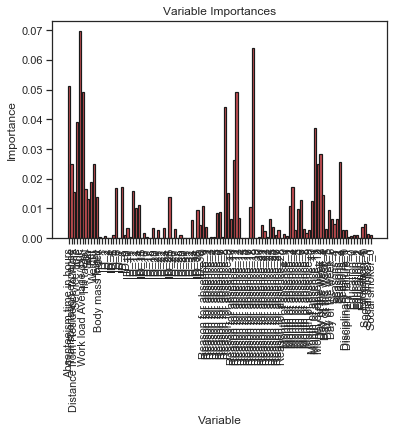

In [38]:
# lImportance plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, data_hotencod.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Number of features for 90% importance: 40


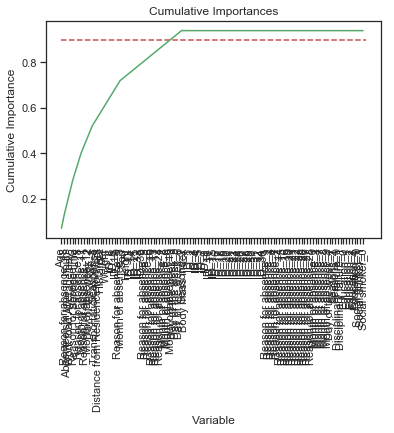

In [39]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

In [40]:
cumulative_importances>0.90

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])